In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#SMOTE family
from imblearn.over_sampling import RandomOverSampler,ADASYN,BorderlineSMOTE,SMOTE,SVMSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.regularizers import l2

#Metrics
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from collections import Counter
from sklearn import metrics
from sklearn.metrics import f1_score , precision_score , recall_score,auc, roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification

import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.metrics import plot_roc_curve

Loading the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Checking for Null Values

In [ ]:
df.isnull().sum().max()

0

Features Correlation

Splitting the data into train and test data

In [ ]:
X = df.drop(['Time','Class'],axis = 1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


Text(0, 0.5, 'Frequency')

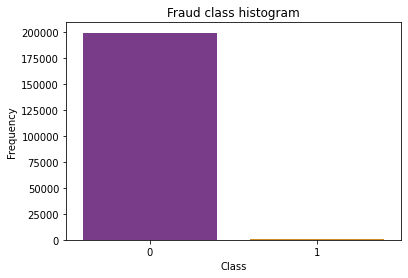

In [ ]:
sns.countplot(x=y_train, data=df, palette='CMRmap')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Training the Models


# Logistic Regression_Unbalanced Data

In [ ]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train) 
y_prediction_LR = logisticreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Metrics Evaluation of Logistic Regression

In [ ]:
print(metrics.classification_report(y_test, y_prediction_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.56      0.68       144

    accuracy                           1.00     85443
   macro avg       0.94      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



Confusion Matrix_Logistic Regression 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.56      0.68       144

    accuracy                           1.00     85443
   macro avg       0.94      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



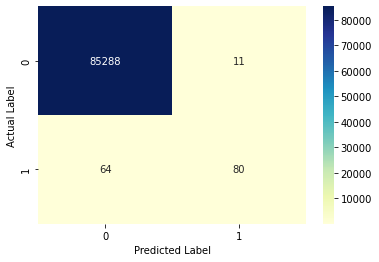

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR))

AUC Score

In [ ]:
metrics.roc_auc_score(y_test , y_prediction_LR)

0.7777132987100278

ROC_AUC Curve Plot

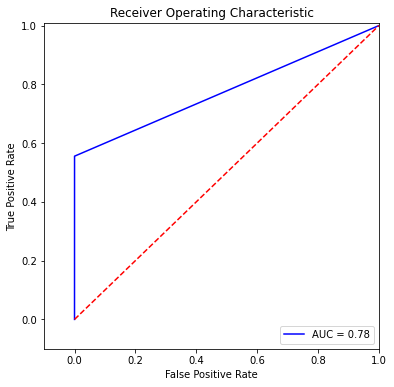

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier_Unbalanced Data

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train) 
y_prediction_RF = RF.predict(X_test)

Metrics Evaluation of RF_Unbalanced Data

0.9995552590615966
ROC_AUC Score 0.8957864394658788


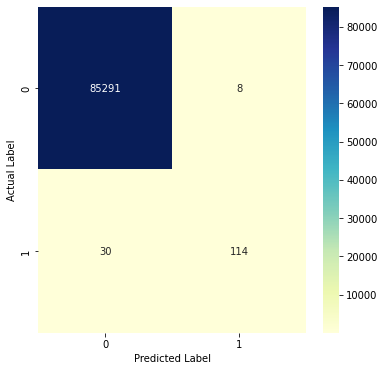

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF))


AUC_Score

In [ ]:
metrics.roc_auc_score(y_test , y_prediction_RF)

ROC_AUC curve plot_RF

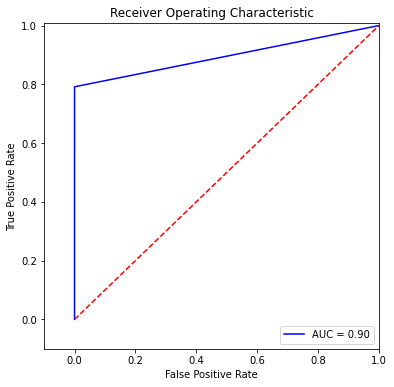

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Support Vector Machine_Unbalanced Data**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_prediction_svc = svc.predict(X_test)

0.998735999438222
ROC_AUC Score 0.6596636048879041


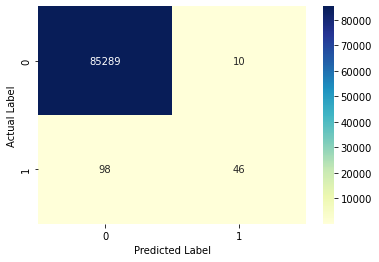

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc))

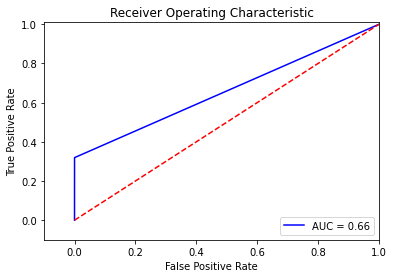

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Artificial Neural Networks_Unbalanced Data

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(X_train, y_train, batch_size= 32, epochs= 10, validation_split= 0.3)

Epoch 1/10
4362/4362 [==============================] - 10s 2ms/step - loss: 0.0815 - accuracy: 0.9965 - val_loss: 0.0353 - val_accuracy: 0.9985
Epoch 2/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0376 - accuracy: 0.9983 - val_loss: 0.0322 - val_accuracy: 0.9984
Epoch 3/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0280 - accuracy: 0.9983 - val_loss: 0.0215 - val_accuracy: 0.9985
Epoch 4/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0311 - accuracy: 0.9983 - val_loss: 0.0193 - val_accuracy: 0.9986
Epoch 5/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0213 - accuracy: 0.9984 - val_loss: 0.0212 - val_accuracy: 0.9984
Epoch 6/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0211 - accuracy: 0.9983 - val_loss: 0.0313 - val_accuracy: 0.9955
Epoch 7/10
4362/4362 [==============================] - 9s 2ms/step - loss: 0.0228 - accuracy: 0.9983 - val_loss: 0.0206 - val_accuracy

In [ ]:
y_prediction_ann = ann.predict(X_test)
y_prediction_ann = (y_prediction_ann > 0.5) 

0.9725313951991386
ROC_AUC Score 0.9411798252812655


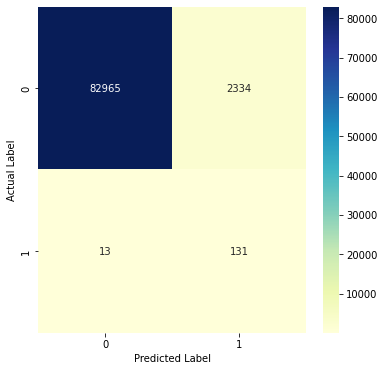

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_rus)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_rus))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_rus))

In [ ]:
metrics.roc_auc_score(y_test , y_prediction_ann)

0.5659370518216313

ROC_AUC Curve plot_ANN

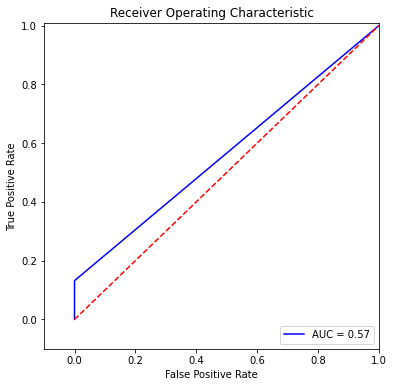

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Undersampling**



In [ ]:
samplingresult = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = samplingresult.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train)

Counter({0: 199016, 1: 348})

In [ ]:

Counter(y_train_rus)

Counter({0: 348, 1: 348})

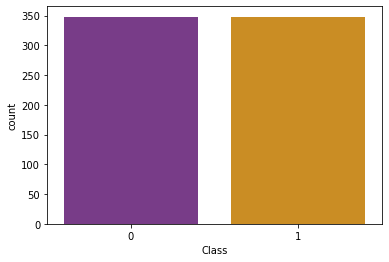

In [ ]:
sns.countplot(x=y_train_rus, data=df, palette='CMRmap')

# **Random Over Sampling**

In [ ]:
ROS = RandomOverSampler(random_state=11)
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_ros)

Counter({0: 199016, 1: 199016})

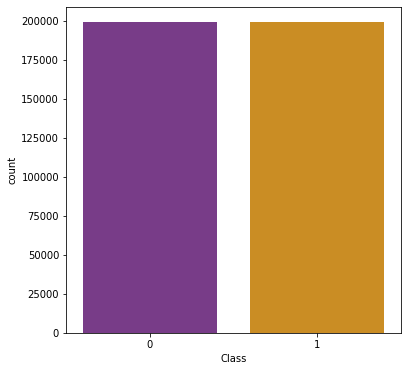

In [ ]:
sns.countplot(x=y_train_ros, data=df, palette='CMRmap')

# **ADASYN**

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_adasyn)

Counter({0: 199016, 1: 199037})

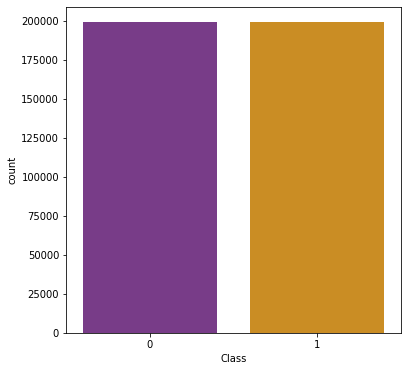

In [ ]:
sns.countplot(x=y_train_adasyn, data=df, palette='CMRmap')

# **BORDERLINE**

In [ ]:
borderline = BorderlineSMOTE(random_state=42)
X_train_borderline, y_train_borderline = borderline.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_borderline)

Counter({0: 199016, 1: 199016})

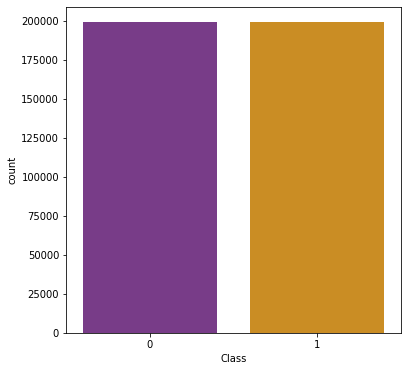

In [ ]:
sns.countplot(x=y_train_borderline, data=df, palette='CMRmap')

# **SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({0: 199016, 1: 199016})

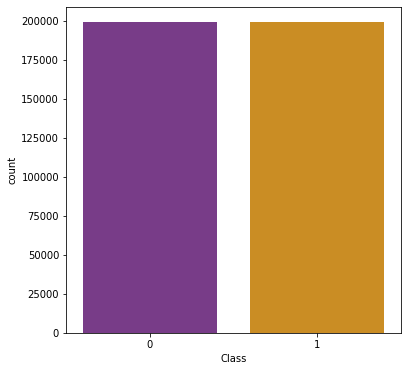

In [ ]:
sns.countplot(x=y_train_smote, data=df, palette='CMRmap')

# **SVM-SMOTE**(19 min)

In [ ]:
svmsmote = SVMSMOTE(random_state=42)
X_train_svsmote, y_train_svsmote = svmsmote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_svsmote)

Counter({0: 199016, 1: 199016})

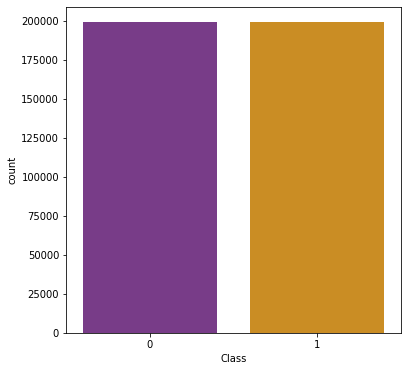

In [ ]:
sns.countplot(x=y_train_svsmote, data=df, palette='CMRmap')

# **SMOTE-ENN**(58 min)

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_svsmoteenn = smoteenn.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_svsmoteenn)

Counter({0: 197835, 1: 198927})

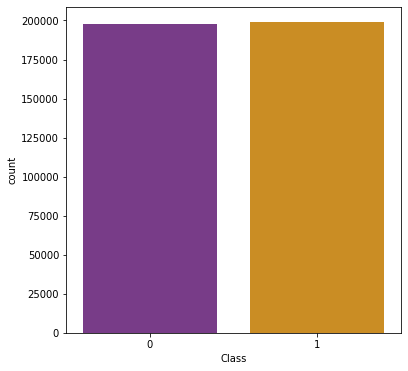

In [ ]:
sns.countplot(x=y_train_svsmoteenn, data=df, palette='CMRmap')

# **LR Model_SMOTE Family**

In [ ]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train_rus, y_train_rus)
y_prediction_LR_rus = logisticreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logisticreg.fit(X_train_ros, y_train_ros)
y_prediction_LR_ros = logisticreg.predict(X_test)
logisticreg.fit(X_train_adasyn, y_train_adasyn)
y_prediction_LR_adasyn = logisticreg.predict(X_test)
logisticreg.fit(X_train_borderline, y_train_borderline)
y_prediction_LR_borderline = logisticreg.predict(X_test)
logisticreg.fit(X_train_smote, y_train_smote)
y_prediction_LR_smote = logisticreg.predict(X_test)
logisticreg.fit(X_train_svsmote, y_train_svsmote)
y_prediction_LR_svsmote = logisticreg.predict(X_test)
logisticreg.fit(X_train_smoteenn, y_train_svsmoteenn)
y_prediction_LR_smoteenn = logisticreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9725313951991386
ROC_AUC Score 0.9411798252812655


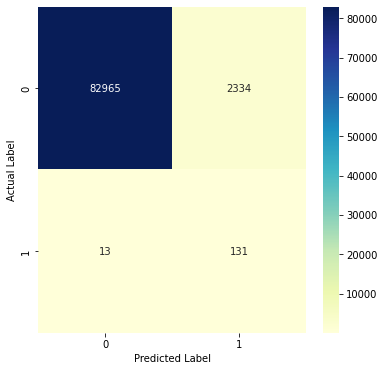

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_rus)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_rus))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_rus))

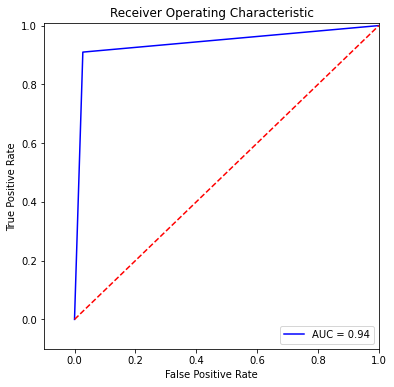

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_rus)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9768032489495921
ROC_AUC Score 0.9398529974950859


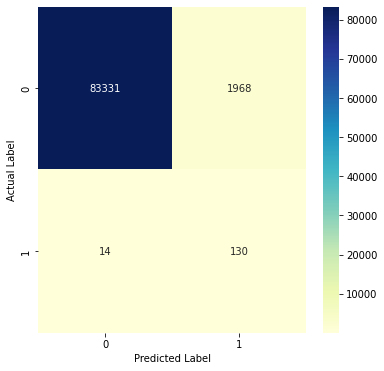

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_ros)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_ros))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_ros))

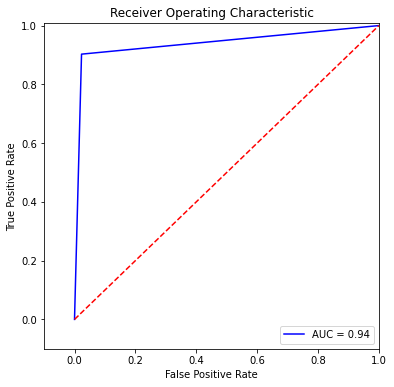

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_ros)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9480589398780473
ROC_AUC Score 0.9358556616529307


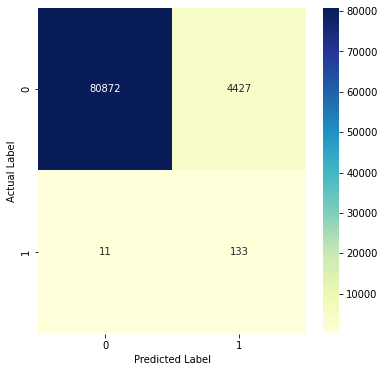

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_adasyn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_adasyn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_adasyn))

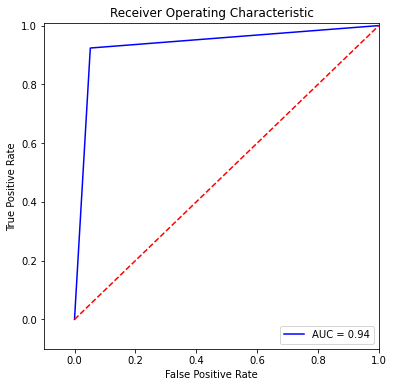

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_adasyn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9927905153143031
ROC_AUC Score 0.9270619624301966


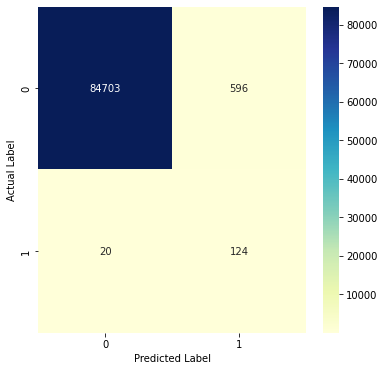

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_borderline)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_borderline))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_borderline))

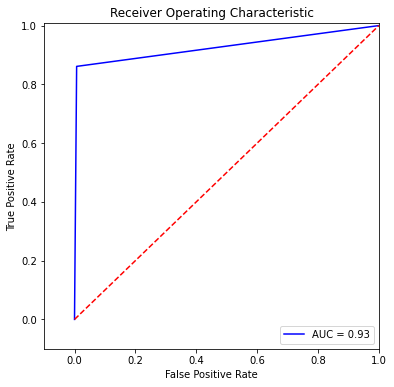

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_borderline)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9794482871622017
ROC_AUC Score 0.941177749250675


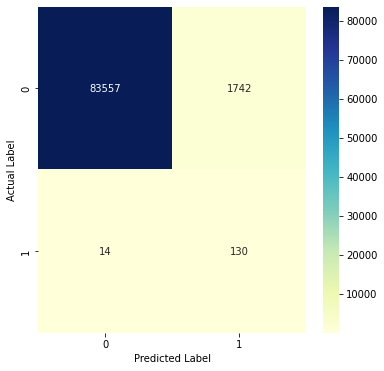

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_smote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_smote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_smote))

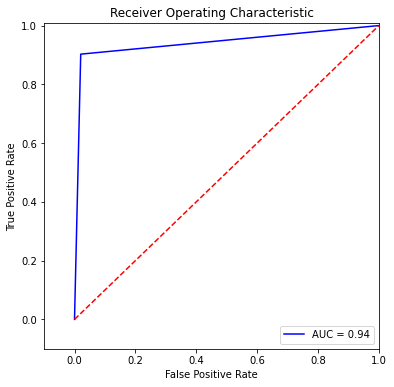

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_smote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9942417752185667
ROC_AUC Score 0.9312551778645314


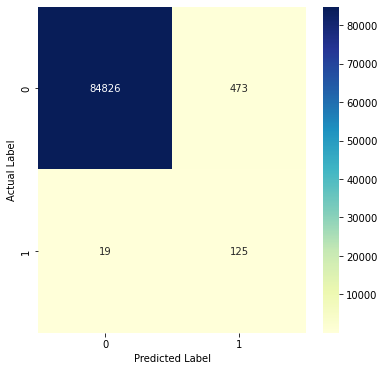

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_svsmote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_svsmote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_svsmote))

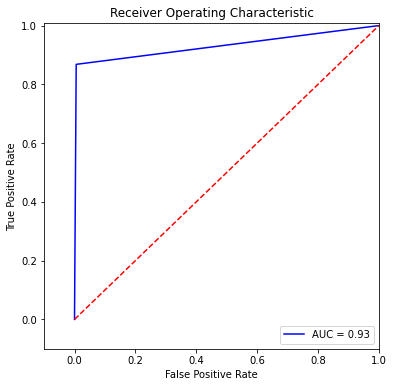

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_svsmote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9803260653301031
ROC_AUC Score 0.9416173792580608


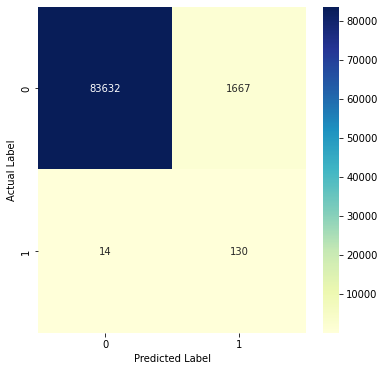

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_LR_smoteenn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_LR_smoteenn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_LR_smoteenn))

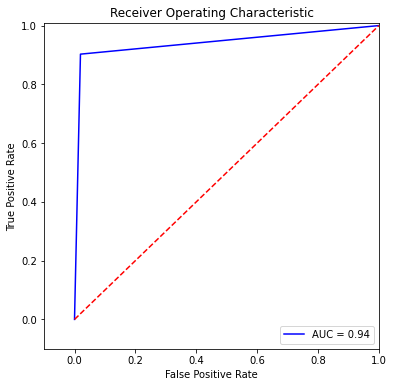

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_LR_smoteenn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Classifier_SMOTE Family**

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_rus, y_train_rus)
y_prediction_RF_rus = RF.predict(X_test)
RF.fit(X_train_ros, y_train_ros)
y_prediction_RF_ros = RF.predict(X_test)
RF.fit(X_train_adasyn, y_train_adasyn)
y_prediction_RF_adasyn = RF.predict(X_test)
RF.fit(X_train_borderline, y_train_borderline)
y_prediction_RF_borderline = RF.predict(X_test)
RF.fit(X_train_smote, y_train_smote)
y_prediction_RF_svsmote = RF.predict(X_test)
RF.fit(X_train_svsmote, y_train_svsmote)
y_prediction_svsmote = RF.predict(X_test)
RF.fit(X_train_smoteenn, y_train_svsmoteenn)
y_prediction_RF_smoteenn = RF.predict(X_test)

0.9703779127605539
ROC_AUC Score 0.9262358243746508


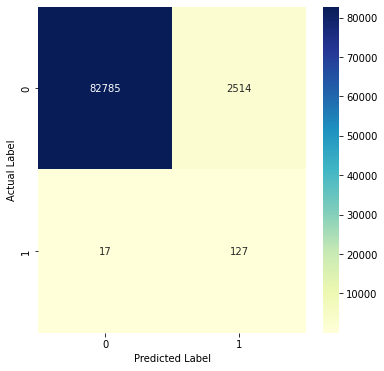

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_rus)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_rus))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_rus))

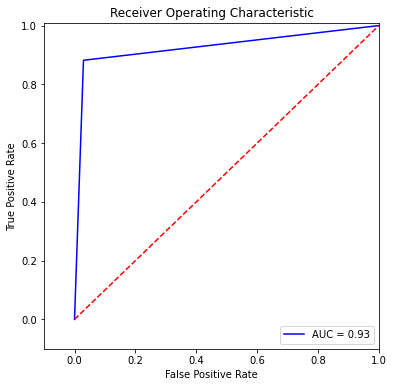

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_rus)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9995552590615966
ROC_AUC Score 0.8923200789770885


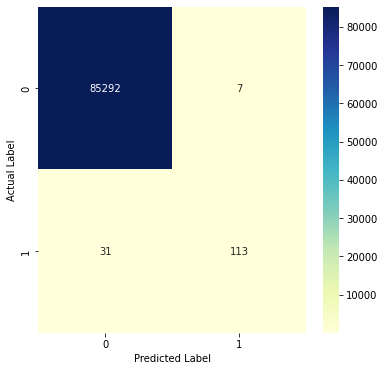

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_ros)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_ros))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_ros))

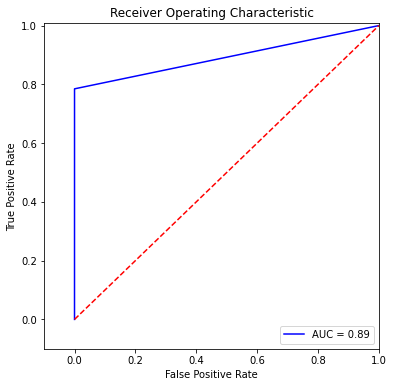

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_ros)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.999602073897218
ROC_AUC Score 0.9200744098211389


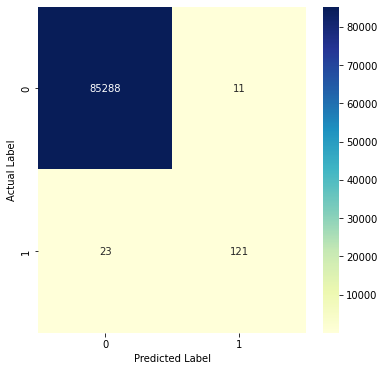

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_adasyn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_adasyn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_adasyn))

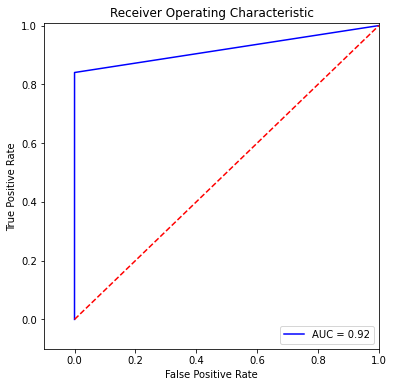

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_adasyn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9996371850239341
ROC_AUC Score 0.916625634532644


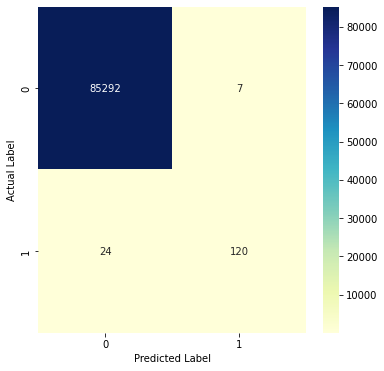

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_borderline)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_borderline))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_borderline))

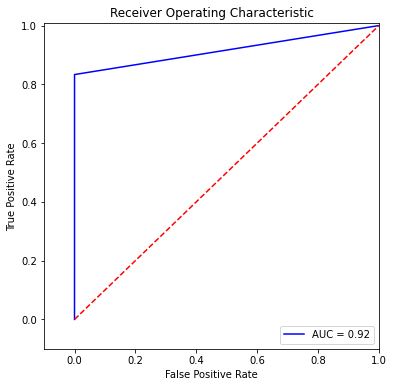

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_borderline)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9995786664794073
ROC_AUC Score 0.916596325865485


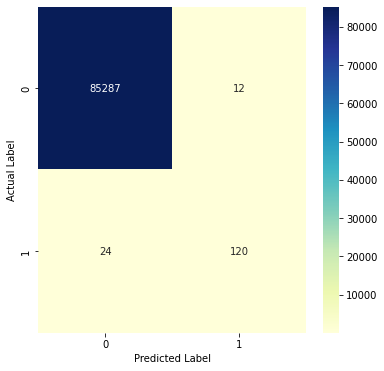

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_svsmote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_svsmote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_svsmote))

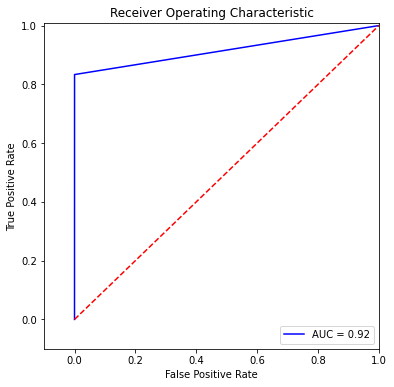

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_svsmote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9995435553526912
ROC_AUC Score 0.9235114616427704


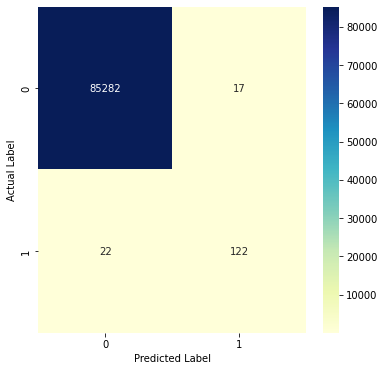

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_RF_smoteenn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_RF_smoteenn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_RF_smoteenn))

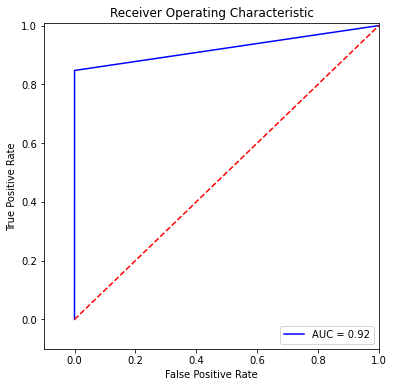

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_RF_smoteenn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Support Vector Machine_SMOTE family** 3h 14min

In [ ]:
svc = SVC()
svc.fit(X_train_rus, y_train_rus)
y_prediction_svc_rus = svc.predict(X_test)
svc.fit(X_train_ros, y_train_ros)
y_prediction_svc_ros = svc.predict(X_test)
svc.fit(X_train_adasyn, y_train_adasyn)
y_prediction_svc_adasyn = svc.predict(X_test)


borderline 40min

In [ ]:
svc.fit(X_train_borderline, y_train_borderline)
y_prediction_svc_borderline = svc.predict(X_test)

Smote(1h 13min)

In [ ]:
svc.fit(X_train_smote, y_train_smote)
y_prediction_svc_smote = svc.predict(X_test)

SVC_Smote (32min)

In [ ]:
svc.fit(X_train_svsmote, y_train_svsmote)
y_prediction_svc_svsmote = svc.predict(X_test)

**SVC_SMOTEENN**(1h 11min)

In [ ]:
svc = SVC()
svc.fit(X_train_smoteenn, y_train_svsmoteenn)
y_prediction_svc_smoteenn = svc.predict(X_test)

0.9460224945285161
ROC_AUC Score 0.7892485795065983


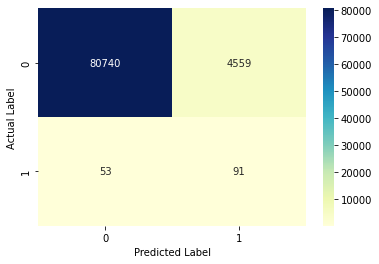

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_rus)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_rus))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_rus))

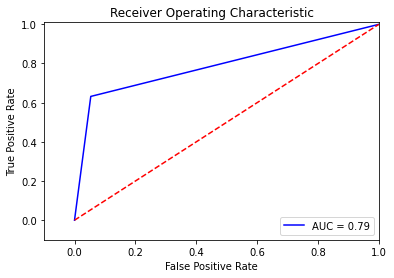

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_rus)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9842351041044907
ROC_AUC Score 0.9401088377354951


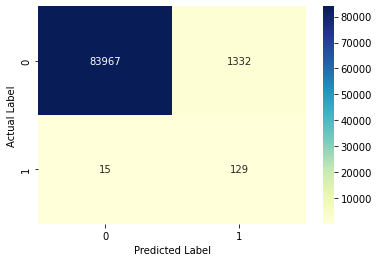

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_ros)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_ros))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_ros))

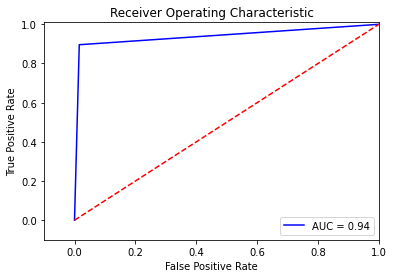

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_ros)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.9550577578034479
ROC_AUC Score 0.928961896778782


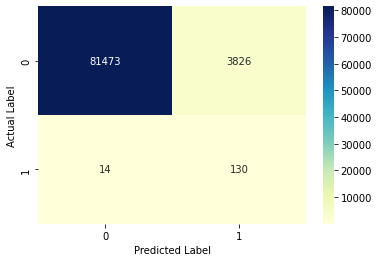

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_adasyn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_adasyn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_adasyn))

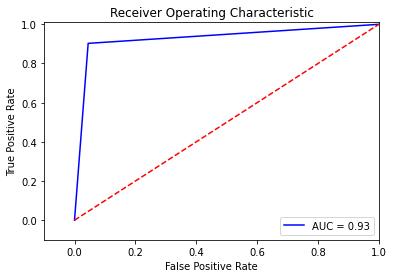

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_adasyn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.991854218601875
ROC_AUC Score 0.919660302778071


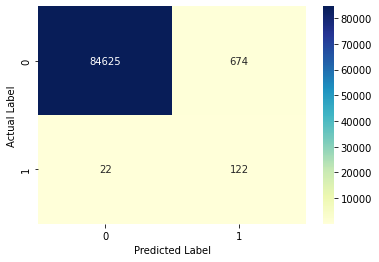

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_borderline)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_borderline))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_borderline))

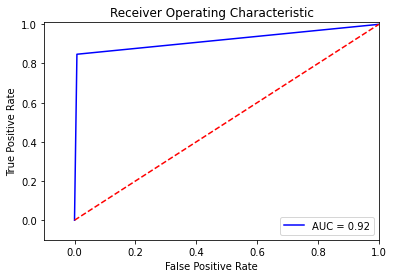

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_borderline)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9878983649918659
ROC_AUC Score 0.935010839322071


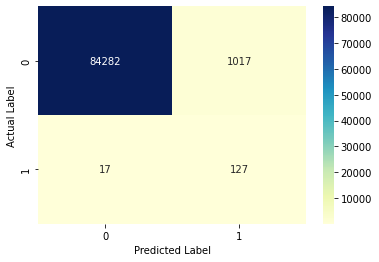

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_smote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_smote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_smote))

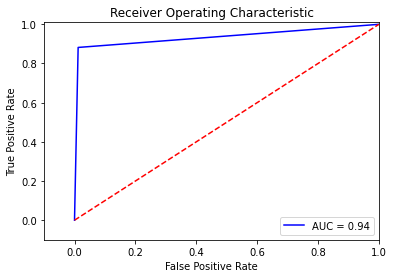

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_smote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9929894783656941
ROC_AUC Score 0.9202288909209565


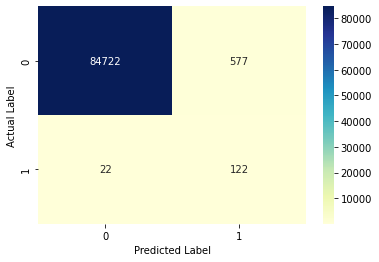

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_svsmote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_svsmote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_svsmote))

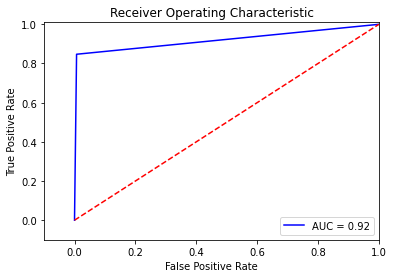

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_svsmote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9840244373441944
ROC_AUC Score 0.9365369660449322


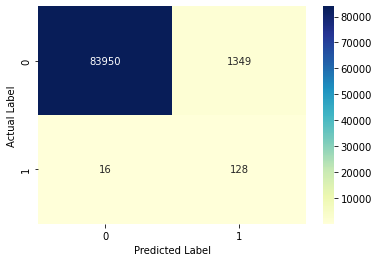

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_svc_smoteenn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_svc_smoteenn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_svc_smoteenn))

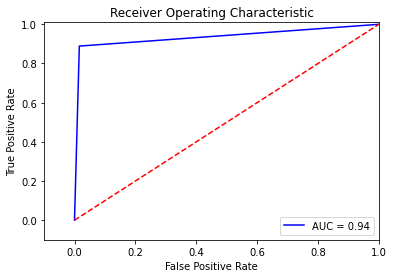

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_svc_smoteenn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **ANN_SMOTE Family**

In [ ]:
ann.fit(X_train_rus, y_train_rus, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_rus = ann.predict(X_test)
y_prediction_ann_rus = (y_prediction_ann_rus > 0.5) 

Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 0.9175 - accuracy: 0.7803 - val_loss: 2.8347 - val_accuracy: 0.2488
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.8193 - val_loss: 2.1149 - val_accuracy: 0.4067
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.8706 - val_loss: 1.0160 - val_accuracy: 0.6794
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.9158 - val_loss: 1.2214 - val_accuracy: 0.7416
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.9343 - val_loss: 0.6131 - val_accuracy: 0.8086
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2772 - accuracy: 0.9343 - val_loss: 0.7973 - val_accuracy: 0.8086
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9487 - val_loss: 0.6040 - val_accuracy: 0.8278
Epoch 8/10
16/16 [==

In [ ]:
ann.fit(X_train_ros, y_train_ros, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_ros = ann.predict(X_test)
y_prediction_ann_ros = (y_prediction_ann_ros > 0.5) 

Epoch 1/10
8707/8707 [==============================] - 19s 2ms/step - loss: 0.1650 - accuracy: 0.9607 - val_loss: 0.2851 - val_accuracy: 0.8871
Epoch 2/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.1587 - accuracy: 0.9609 - val_loss: 0.1727 - val_accuracy: 0.9247
Epoch 3/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.1535 - accuracy: 0.9612 - val_loss: 0.2233 - val_accuracy: 0.9135
Epoch 4/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.1498 - accuracy: 0.9614 - val_loss: 0.5861 - val_accuracy: 0.8785
Epoch 5/10
8707/8707 [==============================] - 19s 2ms/step - loss: 0.1436 - accuracy: 0.9617 - val_loss: 0.2305 - val_accuracy: 0.9020
Epoch 6/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.1354 - accuracy: 0.9622 - val_loss: 0.3450 - val_accuracy: 0.8784
Epoch 7/10
8707/8707 [==============================] - 19s 2ms/step - loss: 0.1262 - accuracy: 0.9629 - val_loss: 0.2283 - val_ac

In [ ]:
ann.fit(X_train_adasyn, y_train_adasyn, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_adasyn = ann.predict(X_test)
y_prediction_ann_adasyn = (y_prediction_ann_adasyn > 0.5) 

Epoch 1/10
8708/8708 [==============================] - 19s 2ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.3650 - val_accuracy: 0.8607
Epoch 2/10
8708/8708 [==============================] - 17s 2ms/step - loss: 0.1064 - accuracy: 0.9741 - val_loss: 0.3103 - val_accuracy: 0.8799
Epoch 3/10
8708/8708 [==============================] - 18s 2ms/step - loss: 0.1011 - accuracy: 0.9756 - val_loss: 0.3407 - val_accuracy: 0.8725
Epoch 4/10
8708/8708 [==============================] - 18s 2ms/step - loss: 0.1030 - accuracy: 0.9749 - val_loss: 0.4171 - val_accuracy: 0.8658
Epoch 5/10
8708/8708 [==============================] - 17s 2ms/step - loss: 0.0991 - accuracy: 0.9763 - val_loss: 0.2745 - val_accuracy: 0.8924
Epoch 6/10
8708/8708 [==============================] - 18s 2ms/step - loss: 0.0965 - accuracy: 0.9768 - val_loss: 0.3013 - val_accuracy: 0.8952
Epoch 7/10
8708/8708 [==============================] - 18s 2ms/step - loss: 0.0962 - accuracy: 0.9770 - val_loss: 0.2908 - val_ac

In [ ]:
ann.fit(X_train_borderline, y_train_borderline, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_borderline = ann.predict(X_test)
y_prediction_ann_borderline = (y_prediction_ann_borderline > 0.5) 


Epoch 1/10
8707/8707 [==============================] - 19s 2ms/step - loss: 0.0380 - accuracy: 0.9930 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 2/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0368 - accuracy: 0.9923 - val_loss: 0.0953 - val_accuracy: 0.9661
Epoch 3/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0345 - accuracy: 0.9928 - val_loss: 0.0640 - val_accuracy: 0.9833
Epoch 4/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0360 - accuracy: 0.9923 - val_loss: 0.0213 - val_accuracy: 0.9971
Epoch 5/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0350 - accuracy: 0.9925 - val_loss: 0.0518 - val_accuracy: 0.9873
Epoch 6/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0341 - accuracy: 0.9928 - val_loss: 0.0665 - val_accuracy: 0.9781
Epoch 7/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0339 - accuracy: 0.9929 - val_loss: 0.0404 - val_ac

In [ ]:
ann.fit(X_train_smote, y_train_smote, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_smote = ann.predict(X_test)
y_prediction_ann_smote = (y_prediction_ann_smote > 0.5) 

Epoch 1/10
8707/8707 [==============================] - 19s 2ms/step - loss: 0.0876 - accuracy: 0.9770 - val_loss: 0.1419 - val_accuracy: 0.9535
Epoch 2/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0812 - accuracy: 0.9796 - val_loss: 0.2204 - val_accuracy: 0.9439
Epoch 3/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0805 - accuracy: 0.9801 - val_loss: 0.1281 - val_accuracy: 0.9539
Epoch 4/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0806 - accuracy: 0.9801 - val_loss: 0.1183 - val_accuracy: 0.9647
Epoch 5/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0798 - accuracy: 0.9805 - val_loss: 0.1283 - val_accuracy: 0.9635
Epoch 6/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0805 - accuracy: 0.9804 - val_loss: 0.1489 - val_accuracy: 0.9565
Epoch 7/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0790 - accuracy: 0.9805 - val_loss: 0.1867 - val_ac

In [ ]:
ann.fit(X_train_svsmote, y_train_svsmote, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_svsmote = ann.predict(X_test)
y_prediction_ann_svsmote = (y_prediction_ann_svsmote > 0.5) 

Epoch 1/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0435 - accuracy: 0.9919 - val_loss: 0.0184 - val_accuracy: 0.9973
Epoch 2/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0431 - accuracy: 0.9919 - val_loss: 0.0240 - val_accuracy: 0.9957
Epoch 3/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0450 - accuracy: 0.9917 - val_loss: 0.0321 - val_accuracy: 0.9947
Epoch 4/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0430 - accuracy: 0.9920 - val_loss: 0.0245 - val_accuracy: 0.9963
Epoch 5/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0443 - accuracy: 0.9918 - val_loss: 0.0268 - val_accuracy: 0.9953
Epoch 6/10
8707/8707 [==============================] - 17s 2ms/step - loss: 0.0431 - accuracy: 0.9918 - val_loss: 0.0265 - val_accuracy: 0.9949
Epoch 7/10
8707/8707 [==============================] - 18s 2ms/step - loss: 0.0437 - accuracy: 0.9919 - val_loss: 0.0165 - val_ac

In [ ]:
ann.fit(X_train_smoteenn, y_train_svsmoteenn, batch_size= 32, epochs= 10, validation_split= 0.3)
y_prediction_ann_smoteenn = ann.predict(X_test)
y_prediction_ann_smoteenn = (y_prediction_ann_smoteenn > 0.5) 


Epoch 1/10
8680/8680 [==============================] - 24s 3ms/step - loss: 0.0809 - accuracy: 0.9790 - val_loss: 0.1560 - val_accuracy: 0.9558
Epoch 2/10
8680/8680 [==============================] - 18s 2ms/step - loss: 0.0769 - accuracy: 0.9810 - val_loss: 0.1032 - val_accuracy: 0.9605
Epoch 3/10
8680/8680 [==============================] - 18s 2ms/step - loss: 0.0763 - accuracy: 0.9811 - val_loss: 0.1219 - val_accuracy: 0.9614
Epoch 4/10
8680/8680 [==============================] - 18s 2ms/step - loss: 0.0762 - accuracy: 0.9817 - val_loss: 0.2077 - val_accuracy: 0.9401
Epoch 5/10
8680/8680 [==============================] - 17s 2ms/step - loss: 0.0768 - accuracy: 0.9814 - val_loss: 0.0816 - val_accuracy: 0.9760
Epoch 6/10
8680/8680 [==============================] - 18s 2ms/step - loss: 0.0756 - accuracy: 0.9817 - val_loss: 0.1478 - val_accuracy: 0.9545
Epoch 7/10
8680/8680 [==============================] - 19s 2ms/step - loss: 0.0755 - accuracy: 0.9818 - val_loss: 0.1315 - val_ac

0.9980922954484276
ROC_AUC Score 0.9089191647420642


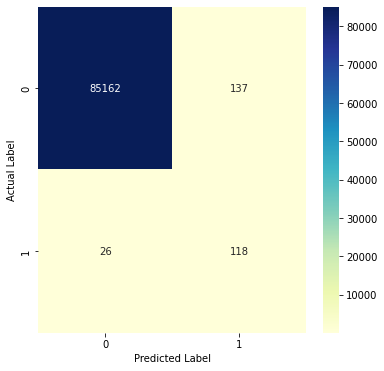

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_rus)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_rus))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_rus))

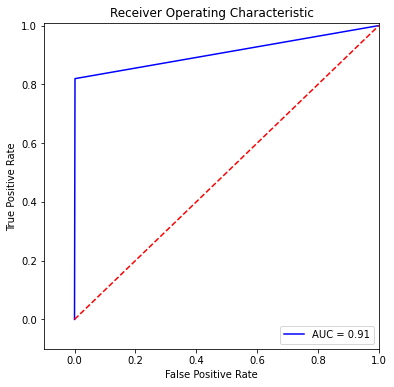

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_rus)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9924628114649533
ROC_AUC Score 0.937296915360477


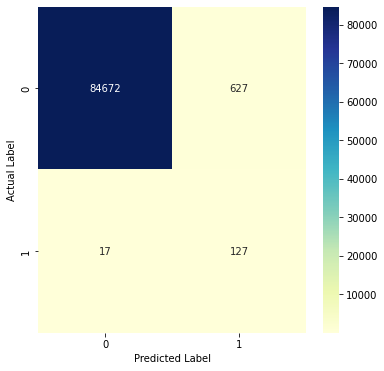

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_ros)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_ros))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_ros))

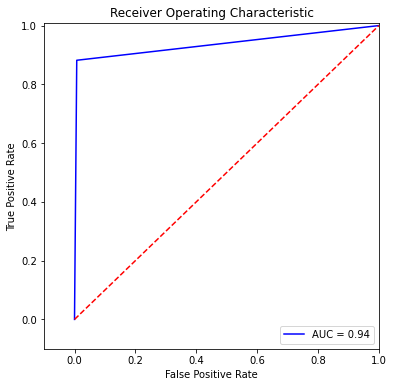

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_ros)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9853118453237831
ROC_AUC Score 0.9441144777000121


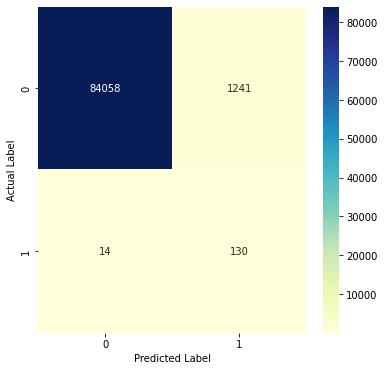

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_adasyn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_adasyn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_adasyn))

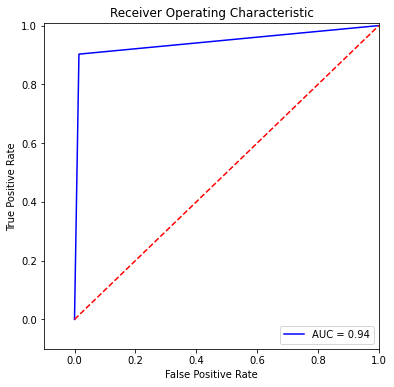

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_adasyn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9953770349823859
ROC_AUC Score 0.9283574055186268


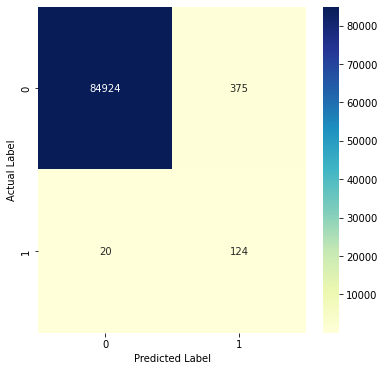

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_borderline)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_borderline))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_borderline))

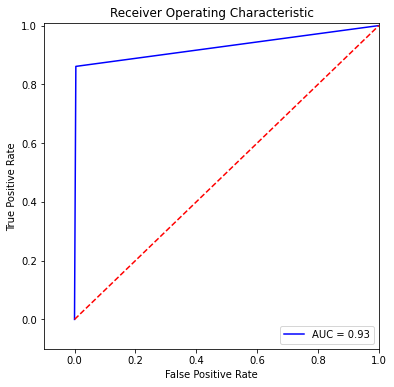

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_borderline)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9903093290263685
ROC_AUC Score 0.9396847168978144


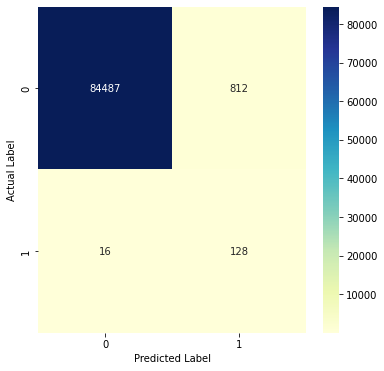

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_smote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_smote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_smote))

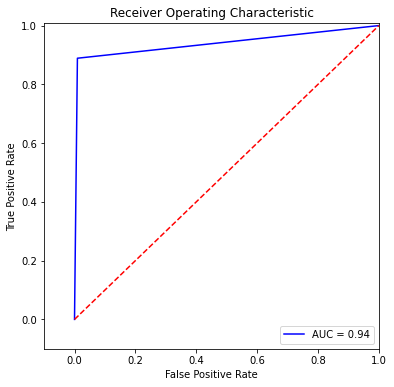

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_smote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9985019252601149
ROC_AUC Score 0.92992248834492


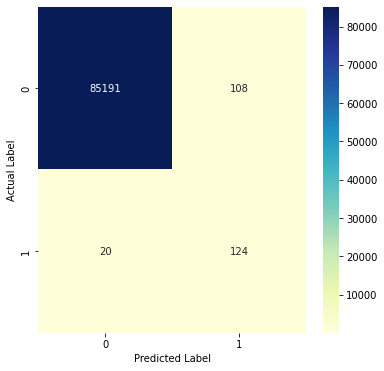

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_svsmote)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_svsmote))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_svsmote))

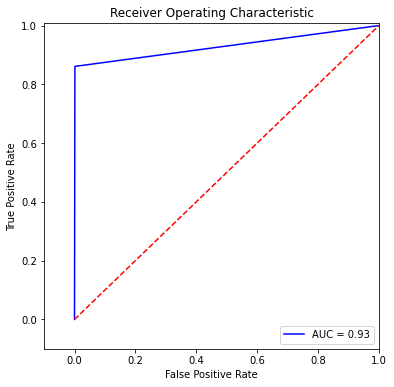

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_svsmote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9775522863195346
ROC_AUC Score 0.9402281484347217


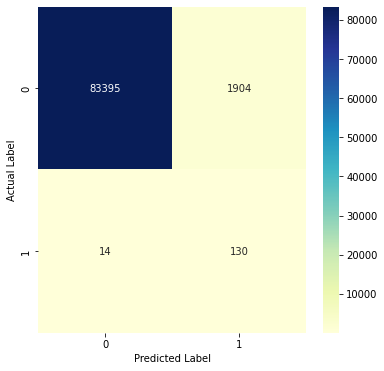

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_prediction_ann_smoteenn)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(accuracy_score(y_test, y_prediction_ann_smoteenn))
print("ROC_AUC Score",metrics.roc_auc_score(y_test , y_prediction_ann_smoteenn))

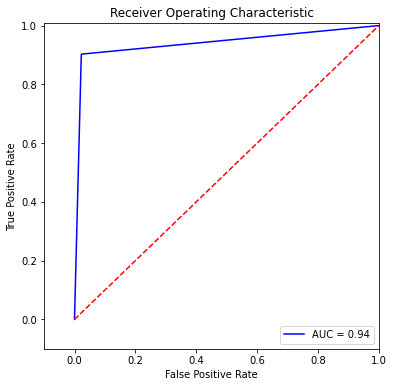

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prediction_ann_smoteenn)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()